In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import warnings
warnings.filterwarnings("ignore")

In [2]:
house_price = pd.read_csv("C:/Users/AKASH HN/Downloads/Internship/House_price_data/train.csv")
test_data = pd.read_csv("C:/Users/AKASH HN/Downloads/Internship/House_price_data/test.csv")
house_price.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [3]:
house_price.isnull().sum().sort_values(ascending = False)

PoolQC         1453
MiscFeature    1406
Alley          1369
Fence          1179
MasVnrType      872
               ... 
ExterQual         0
Exterior2nd       0
Exterior1st       0
RoofMatl          0
SalePrice         0
Length: 81, dtype: int64

In [4]:
house_price.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


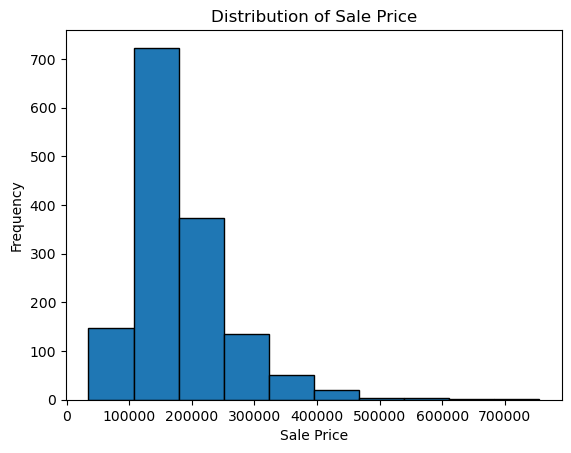

In [5]:
house_price.SalePrice.plot.hist(bins = 10,edgecolor = 'black')
plt.title('Distribution of Sale Price')
plt.xlabel('Sale Price')
plt.show()

#### Variable Influencing Rating

In [7]:
encoder = LabelEncoder()
cat = [cols for cols in house_price.columns if cols not in house_price.select_dtypes(include = 'number').columns]
print('Variable influencing rating')
for col in cat:
    house_price[col]  = encoder.fit_transform(house_price[col])
house_price.corr()['SalePrice'].abs().sort_values(ascending = False)


Variable influencing rating


SalePrice       1.000000
OverallQual     0.790982
GrLivArea       0.708624
GarageCars      0.640409
ExterQual       0.636884
                  ...   
Utilities       0.014314
BsmtFinSF2      0.011378
BsmtFinType2    0.008041
Condition2      0.007513
GarageQual      0.006861
Name: SalePrice, Length: 81, dtype: float64

In [8]:
data = house_price[['TotalBsmtSF', 'BedroomAbvGr', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath','SalePrice']]

In [9]:
data.isnull().sum()

TotalBsmtSF     0
BedroomAbvGr    0
BsmtFullBath    0
BsmtHalfBath    0
FullBath        0
HalfBath        0
SalePrice       0
dtype: int64

<Axes: >

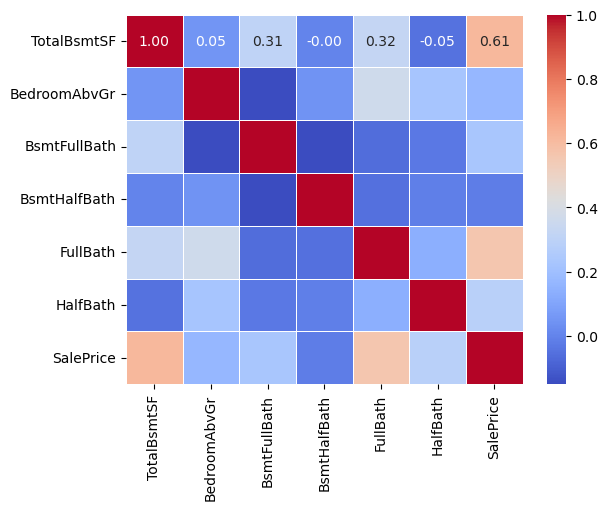

In [10]:
sns.heatmap(data.corr(),annot = True,cmap = 'coolwarm',fmt = '.2f',linewidth = 0.5)

#### Variance Inflation

In [11]:
corr = data.corr()
print('Variance Inflation')
df_vif = data.drop('SalePrice',axis = 1)
VIF_data = pd.DataFrame()
VIF_data['Features'] = df_vif.columns
VIF_data['VIF'] = [variance_inflation_factor(df_vif.values,i) for i in range(len(df_vif.columns))]
VIF_data

Variance Inflation


,Features,VIF
0,TotalBsmtSF,7.984793
1,BedroomAbvGr,9.964517
2,BsmtFullBath,1.918134
3,BsmtHalfBath,1.091187
4,FullBath,11.375324
5,HalfBath,1.686508


#### Checking for Outliers

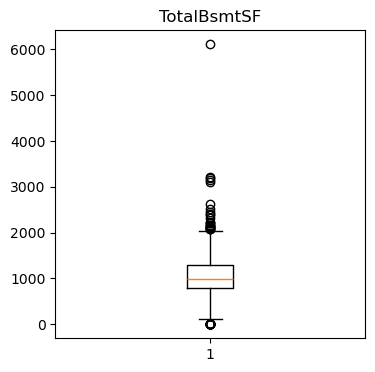

In [12]:
plt.figure(figsize = (4,4))
plt.boxplot(data['TotalBsmtSF'])
plt.title('TotalBsmtSF')
plt.show()

#### Removing Outliers

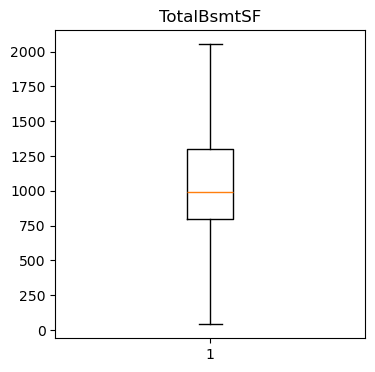

In [13]:
def rem_outlier(df):
    new_df = df.copy()
    for col in df.columns:
        q1 = data[col].quantile(0.25)
        q3 = data[col].quantile(0.75)
        
        IQR = q3 - q1
        lower = q1 - 1.5*IQR
        upper = q3 + 1.5*IQR
        new_df[col] = new_df[col].apply(lambda x: lower if x<lower
                                       else upper if x>upper else x)
    return new_df
data = rem_outlier(data)
plt.figure(figsize = (4,4))
plt.boxplot(data['TotalBsmtSF'])
plt.title('TotalBsmtSF')
plt.show()

In [14]:
X = data[['TotalBsmtSF', 'BedroomAbvGr', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath']]
Y = data['SalePrice']
X_train,X_test,y_train,y_test = train_test_split(X,Y,test_size = 0.2,random_state = 0)

In [15]:
model = LinearRegression()
model.fit(X_train,y_train)
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test,y_pred)
r2s = r2_score(y_test,y_pred)
print('Mean Squared error :', round(mse,2))
print('R-squared :', round(r2s,2))

Mean Squared error : 1778107510.67
R-squared : 0.59


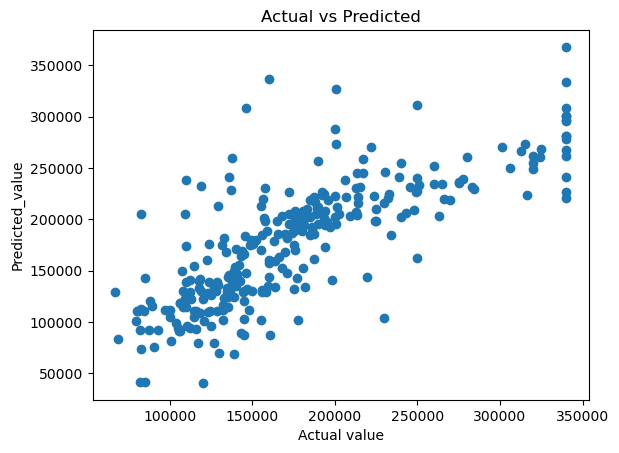

In [16]:
plt.scatter(y_test,y_pred)
plt.title('Actual vs Predicted')
plt.xlabel('Actual value')
plt.ylabel('Predicted_value')
plt.show()

In [17]:
X.sample(5)

,TotalBsmtSF,BedroomAbvGr,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath
900,858.0,2.0,0.0,0.0,1,0
487,1484.0,3.0,0.0,0.0,2,0
1458,1078.0,2.0,1.0,0.0,1,0
978,894.0,3.0,0.0,0.0,1,0
1023,1346.0,2.0,0.0,0.0,2,0


In [19]:
new_data = np.array([[800.0,2.0,0.0,0.0,2,1]])
model_pred = model.predict(new_data)
print('Predict price value: ',round(model_pred[0],2))

Predict price value:  196162.4
